In [1]:
import numpy as np
import numpy.random as rd
import scipy.stats as st
import pandas as pd
from tabulate import tabulate

import math

import copy, sys
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)

In [2]:
P = [[0.3, 0.3, 0.4],
     [0.1, 0.5, 0.4],
     [0.2, 0.6, 0.2]]

In [3]:
def calc(x, l, num):
    #print x
    tmp = copy.copy(x)
    for i in range(num):
        tmp = np.dot(tmp, P)
        l.append(tmp)

In [6]:
result = []
init = [0.6, 0.25, 0.15]
result.append(init)
calc(init, result, 10)

In [7]:
print tabulate(np.array(result),["A", "B", "C"], tablefmt="pipe")

|        A |        B |        C |
|---------:|---------:|---------:|
| 0.6      | 0.25     | 0.15     |
| 0.235    | 0.395    | 0.37     |
| 0.184    | 0.49     | 0.326    |
| 0.1694   | 0.4958   | 0.3348   |
| 0.16736  | 0.4996   | 0.33304  |
| 0.166776 | 0.499832 | 0.333392 |
| 0.166694 | 0.499984 | 0.333322 |
| 0.166671 | 0.499993 | 0.333336 |
| 0.166668 | 0.499999 | 0.333333 |
| 0.166667 | 0.5      | 0.333333 |
| 0.166667 | 0.5      | 0.333333 |


In [14]:
pd.DataFrame(np.array(result),columns=["A", "B", "C"])

,A,B,C
0,0.600000,0.250000,0.150000
1,0.235000,0.395000,0.370000
2,0.184000,0.490000,0.326000
3,0.169400,0.495800,0.334800
4,0.167360,0.499600,0.333040
5,0.166776,0.499832,0.333392
6,0.166694,0.499984,0.333322
7,0.166671,0.499993,0.333336
8,0.166668,0.499999,0.333333
9,0.166667,0.500000,0.333333


In [10]:
result = []
for init in [[0.6, 0.25, 0.15], [0.3, 0.3, 0.4], [0.1,0.1,0.8]]:
    tmp = []
    tmp.append(init)
    calc(init, tmp, 10)
    if len(result) != 0:
        result = np.c_[np.array(result), np.array(tmp)]
    else:
        result = np.array(tmp)

In [11]:
pd.DataFrame(np.array(result),columns=["A", "B", "C","A", "B", "C","A", "B", "C"])

,A,B,C,A,B,C,A,B,C
0,0.600000,0.250000,0.150000,0.300000,0.300000,0.400000,0.100000,0.100000,0.800000
1,0.235000,0.395000,0.370000,0.200000,0.480000,0.320000,0.200000,0.560000,0.240000
2,0.184000,0.490000,0.326000,0.172000,0.492000,0.336000,0.164000,0.484000,0.352000
3,0.169400,0.495800,0.334800,0.168000,0.499200,0.332800,0.168000,0.502400,0.329600
4,0.167360,0.499600,0.333040,0.166880,0.499680,0.333440,0.166560,0.499360,0.334080
5,0.166776,0.499832,0.333392,0.166720,0.499968,0.333312,0.166720,0.500096,0.333184
6,0.166694,0.499984,0.333322,0.166675,0.499987,0.333338,0.166662,0.499974,0.333363
7,0.166671,0.499993,0.333336,0.166669,0.499999,0.333332,0.166669,0.500004,0.333327
8,0.166668,0.499999,0.333333,0.166667,0.499999,0.333334,0.166666,0.499999,0.333335
9,0.166667,0.500000,0.333333,0.166667,0.500000,0.333333,0.166667,0.500000,0.333333


# sampling

In [13]:
P = [[0.3, 0.3, 0.4],
     [0.1, 0.5, 0.4],
     [0.2, 0.6, 0.2]]

In [14]:
init = [60, 25, 15]

In [15]:
next_state = np.array([0, 0, 0])
result = []
result.append(init)
for k in range(30000):#150000):
    next_state = [0, 0, 0]
    for i, num in enumerate(init):
        for j in range(num):
            next_state = next_state + rd.multinomial(1, P[i])
    result.append(next_state)
    init = copy.copy(next_state)
    

In [16]:
n_burn_in = 100

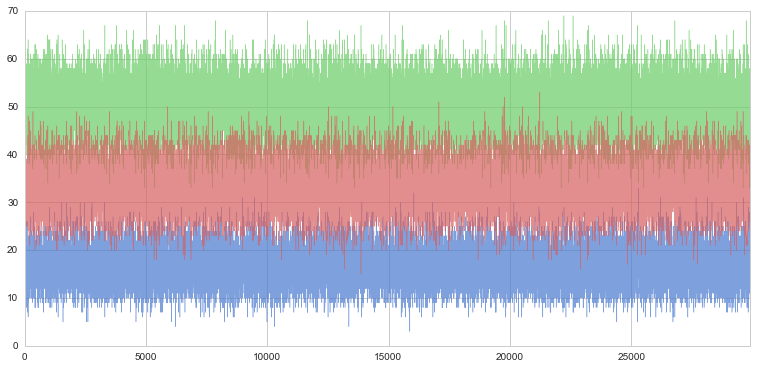

In [17]:
plt.figure(figsize=(13,6))
plt.plot(result[n_burn_in:], lw=.5, alpha=.7)
plt.xlim(0, len(result)-n_burn_in)
plt.show()

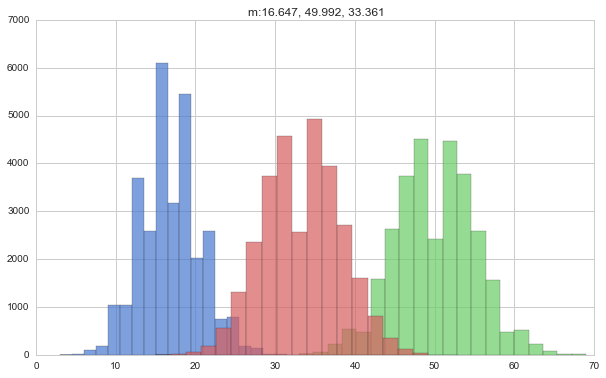

In [18]:
plt.figure(figsize=(10,6))
plt.hist(np.array(result)[n_burn_in:,0], bins=20, color="b", alpha=.7)
plt.hist(np.array(result)[n_burn_in:,1], bins=20, color="g", alpha=.7)
plt.hist(np.array(result)[n_burn_in:,2], bins=20, color="r", alpha=.7)
plt.title("m:{0:.3f}, {1:.3f}, {2:.3f}".format(np.mean(np.array(result)[n_burn_in:,0]),
                              np.mean(np.array(result)[n_burn_in:,1]),np.mean(np.array(result)[n_burn_in:,2])))
plt.show()

In [19]:
[np.mean(np.array(result)[n_burn_in:,i]) for i in range(3)]

[16.646700779238152, 49.992408280659511, 33.360890940102337]

## 独立MH法

ガンマ関数
$$
f(x|k, t) = {k^t \over \Gamma(k)} x^{k-1} \exp(-tx)
$$

In [155]:
prop_m = 1
prop_sd = 0.5 #np.sqrt(0.5)

def f_gamma(x):
    k = 11
    t = 13
    return  x**(k-1) * np.exp(-t*x)

def q(theta):
    return st.norm.pdf(theta, loc=prop_m, scale=prop_sd)

def rand_prop():
    return st.norm.rvs(prop_m, prop_sd)

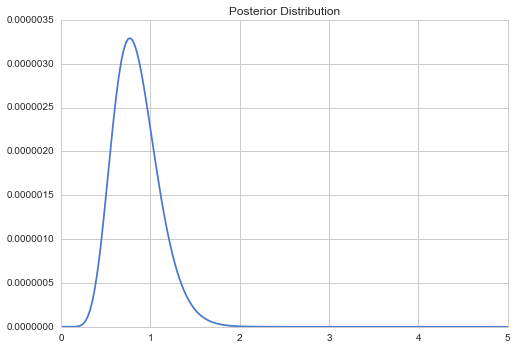

In [156]:
x = np.linspace(0,5,201)

plt.plot(x,f_gamma(x))
plt.title("Posterior Distribution")

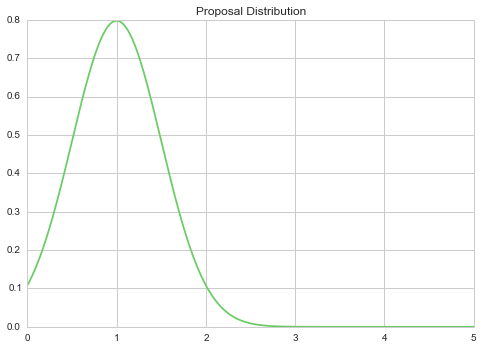

In [157]:
plt.title("Proposal Distribution")
plt.plot(x, q(x), "g")

## 独立MH法

確率的補正
$$
r = { q(\theta^{(t)}) f(a) \over q(a)f(\theta^{(t)})}
$$

In [158]:
theta = []

# Initial value
current = 1
theta.append(current)

n_itr = 100000

for i in range(n_itr):
    # 提案分布からの乱数生成
    a = rand_prop()
    if a < 0:
        continue

    r = (q(current)*f(a)) / (q(a)*f(current))
    assert r > 0
    
    if r < 0:
        #reject
        continue
    if r >= 1 or r > st.uniform.rvs():
        # Accept
        theta.append(a)
        current = a
    else:
        #Reject
        pass

In [159]:
len(theta)

53916

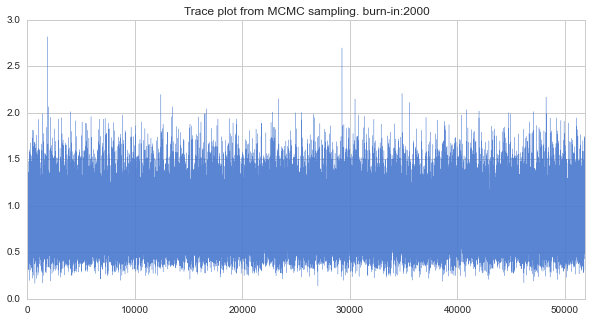

In [164]:
n_burn_in = 2000
plt.figure(figsize=(10,5))
plt.xlim(0, len(theta)-n_burn_in)
plt.title("Trace plot from MCMC sampling. burn-in:{}".format(n_burn_in))
plt.plot(theta[n_burn_in:], alpha=0.9, lw=.3)

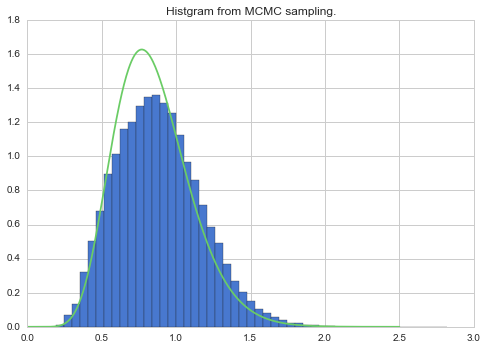

In [162]:
plt.title("Histgram from MCMC sampling.")
plt.hist(theta[n_burn_in:], bins=50, normed=True)

xx = np.linspace(0, 2.5,501)
plt.plot(xx, st.gamma(11, 0, 1/13.).pdf(xx))
plt.show()


In [163]:

kk = 11.
tt = 13.
print "sample mean:{0:.5f}, sample std:{1:.5f}".format(np.mean(theta), np.std(theta))
# 理論期待値・分散
print "mean:{0:.5f}, std:{1:.5f}".format( kk/tt, np.sqrt(kk*((1/tt)**2)))

sample mean:0.88094, sample std:0.28639
mean:0.84615, std:0.25512


## 正選手問題

In [115]:
prop_m = 1
prop_sd = np.sqrt(0.5)

def f_beta(x):
    p = 10.2
    q = 5.8
    return x**(p-1) * (1-x)**(q-1)

def q_unif(x):
    return st.uniform.pdf(x)

def rand_prop():
    return st.uniform.rvs()

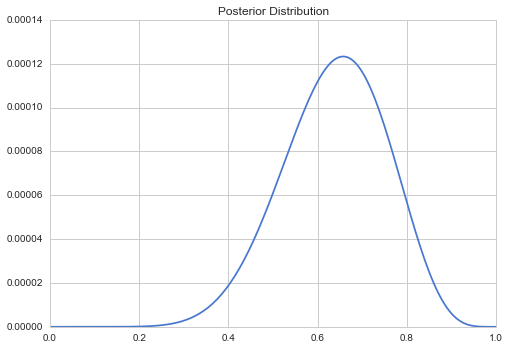

In [116]:
x = np.linspace(0,1,201)
plt.plot(x,f_beta(x))
plt.title("Posterior Distribution")

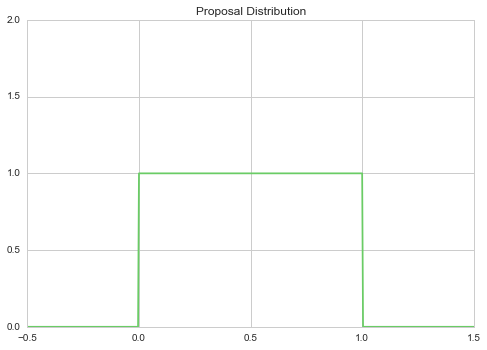

In [117]:
x = np.linspace(-.5,1.5,501)
plt.ylim(0, 2)
plt.title("Proposal Distribution")
plt.plot(x, q_unif(x), "g")

In [118]:
theta = []

# Initial value
current = 0.5
theta.append(current)

n_itr = 2000000

for i in range(n_itr):
    # 提案分布からの乱数生成
    a = rand_prop()

    r = f_beta(a) / f_beta(current)
    assert r > 0
    
    if r < 0:
        #reject
        continue
    if r >= 1 or r > st.uniform.rvs():
        # Accept
        theta.append(a)
        current = a
    else:
        #Reject
        pass

In [119]:
len(theta)

748518

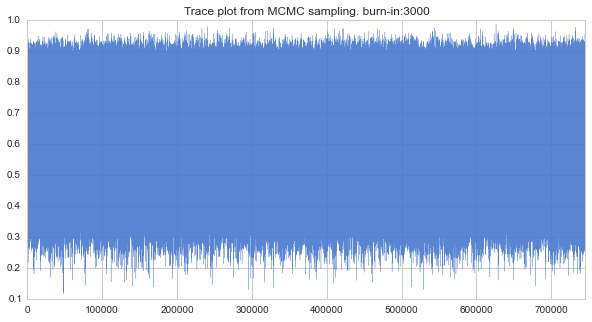

In [123]:
n_burn_in = 3000
plt.figure(figsize=(10,5))
plt.title("Trace plot from MCMC sampling. burn-in:{}".format(n_burn_in))
plt.xlim(0, len(theta)-n_burn_in)
plt.plot(theta[n_burn_in:], alpha=0.9, lw=.3)

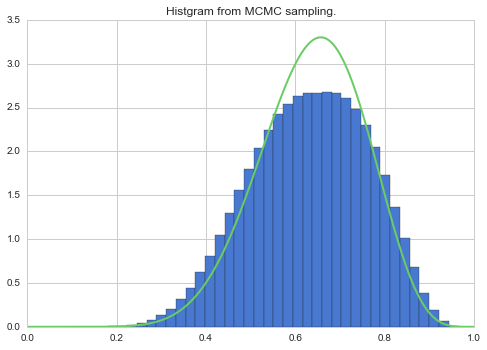

sample mean:0.63239, sample std:0.13082
mean:0.63750, std:0.12412


In [121]:
plt.title("Histgram from MCMC sampling.")
plt.hist(theta[n_burn_in:], bins=40, normed=True)
xx = np.linspace(0, 1,501)

a=10.2
b=5.8

plt.plot(xx, st.beta.pdf(xx, a, b),lw=2)
plt.show()

print "sample mean:{0:.5f}, sample std:{1:.5f}".format(np.mean(theta), np.std(theta))
# 理論期待値・分散
print "mean:{0:.5f}, std:{1:.5f}".format( a/(a+b), np.sqrt((a*b)/((a+b)**2*(a+b-1))) )

## 提案分布の選び方

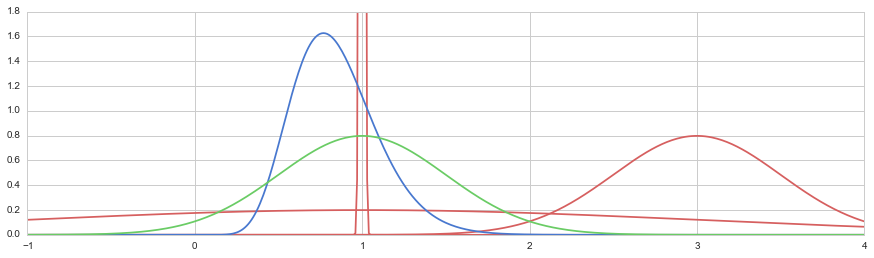

In [172]:
x = np.linspace(-1,4,501)

plt.figure(figsize=(15,4))

plt.ylim(0,1.8)

plt.plot(x, st.norm.pdf(x, loc=1, scale=2), "r")
plt.plot(x, st.norm.pdf(x, loc=1, scale=0.01), "r")
plt.plot(x, st.norm.pdf(x, loc=3, scale=0.5), "r")

plt.plot(x, st.gamma(11, 0, 1/13.).pdf(x))

plt.plot(x, st.norm.pdf(x, loc=1, scale=0.5), "g")

## ランダムウォークMH法

In [3]:
prop_m = 1
prop_sd = 0.5 #np.sqrt(0.5)

def f_gamma(x):
    k = 11
    t = 13
    return  x**(k-1) * np.exp(-t*x)

def q(theta):
    return st.norm.pdf(theta, loc=prop_m, scale=prop_sd)

def rand_prop(m):
    return st.norm.rvs(m, prop_sd)

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199


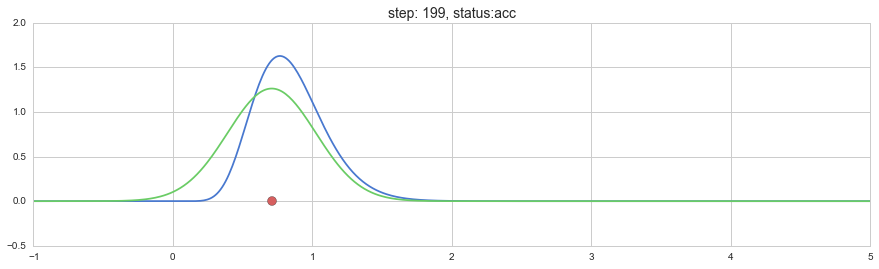

In [13]:
# Generate Animation
theta = []
current  = 4
theta.append(current)

prop_sd = np.sqrt(0.10)
x = np.linspace(-1,5,501)

def animate(nframe):
    global current
    print nframe,
    
    plt.clf()
    plt.xlim(-1,5)
    
    a = rand_prop(current)  # 提案分布からの乱数生成
    r = f_gamma(a) / f_gamma(current)
    
    if a < 0 or r < 0:
        #reject
        status = "rej"
        col = "r"
    elif r >= 1 or r > st.uniform.rvs():
        # Accept
        theta.append(a)
        current = a
        status = "acc"
        col = "r"
    else:
        #Reject
        status = "rej"
        col = "k"

    plt.plot(x, st.gamma(11, 0, 1/13.).pdf(x))
    plt.plot(x, st.norm.pdf(x, loc=current, scale=prop_sd), "g")
    
    plt.scatter([a], [0.], s=80, c=col ,zorder=100)
    
    plt.title("step:{0:>4}, status:{1}".format(nframe, status), size=14)

num_frame = 200.
fig = plt.figure(figsize=(15,4))
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame), blit=True)
anim.save('randomwalk_mh2.gif', writer='imagemagick', fps=5, dpi=64)


In [37]:
# MCMC sampling

theta = []
current  = 4
theta.append(current)
n_itr = 100000
prop_sd = np.sqrt(0.10)
x = np.linspace(-1,5,501)

for i in range(n_itr):
    a = rand_prop(current)  # 提案分布からの乱数生成
    r = f_gamma(a) / f_gamma(current)
    
    if a < 0 or r < 0:
        #reject
        pass
    elif r >= 1 or r > st.uniform.rvs():
        # Accept
        theta.append(a)
        current = a
        status = "acc"
        col = "r"
    else:
        #Reject
        pass


In [38]:
len(theta)

63823

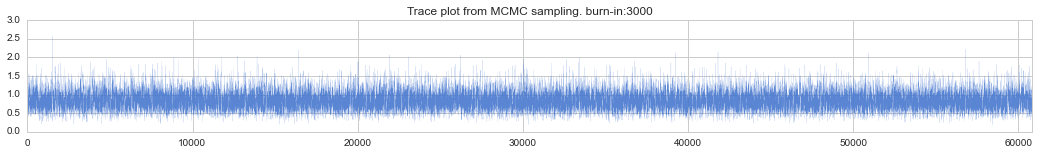

In [39]:
n_burn_in = 3000
plt.figure(figsize=(18,2))
plt.title("Trace plot from MCMC sampling. burn-in:{}".format(n_burn_in))
plt.xlim(0, len(theta)-n_burn_in)
plt.plot(theta[n_burn_in:], alpha=0.9, lw=.1)

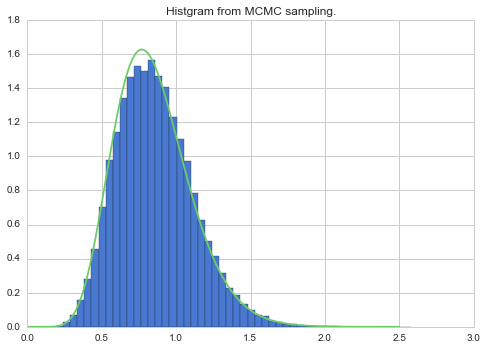

sample mean:0.85931, sample std:0.25826
mean:0.84615, std:0.25512


In [106]:
plt.title("Histgram from MCMC sampling.")
n, b, p = plt.hist(theta[n_burn_in:], bins=50, normed=True)

xx = np.linspace(0, 2.5,501)
plt.plot(xx, st.gamma(11, 0, 1/13.).pdf(xx))
plt.show()

kk = 11.
tt = 13.
print "sample mean:{0:.5f}, sample std:{1:.5f}".format(np.mean(theta), np.std(theta))
# 理論期待値・分散
print "mean:{0:.5f}, std:{1:.5f}".format( kk/tt, np.sqrt(kk*((1/tt)**2)))

In [41]:
print "sample size(exclude: burn-in period)", len(theta) - n_burn_in
print "sample mean:{0:.5f}, sample std:{1:.5f}".format(np.mean(theta), np.std(theta))

sample size(exclude: burn-in period) 60823
sample mean:0.85931, sample std:0.25826


In [43]:
df_theta = pd.DataFrame(theta[n_burn_in:])

In [70]:
df_theta.columns = ["data"]

In [94]:
df_theta.describe()

,data
count,60823.000000
mean,0.859056
std,0.257280
min,0.192754
25%,0.672256
50%,0.838166
75%,1.019236
max,2.576171


In [123]:
print "{0:.6f}".format(np.percentile(df_theta, 2.5))
print "{0:.6f}".format(np.percentile(df_theta, 97.5))
print "mode:{0:.6f}".format(b[np.argmax(n)])

0.428473
1.423322
mode:0.812443


In [132]:
# ガンマ分布の理論値
k = 11
theta = 1/13.
dist = st.gamma(11, 0, 1/13.)
print "E:{0:.6f}".format(k*theta)
print "V:{0:.6f}".format(k*theta**2)
print "std:{0:.6f}".format(np.sqrt(k*theta**2))
print "mode:{0:.6f}".format((k-1)*theta)
print "2.5%:{0:.6f}".format(dist.ppf(0.025))
print "25%:{0:.6f}".format(dist.ppf(0.25))
print "Median:{0:.6f}".format(dist.ppf(0.5))
print "75%:{0:.6f}".format(dist.ppf(0.75))
print "97.5%:{0:.6f}".format(dist.ppf(0.975))


E:0.846154
V:0.065089
std:0.255125
mode:0.769231
2.5%:0.422397
25%:0.663062
Median:0.820656
75%:1.001510
97.5%:1.414643
